 # Lecture 4:  Balance and Sequentiality in Bayesian Analyses 
 
 ## Instructor: Dr. Hu Chuan-Peng  


### Different priors, different posteriors

**贝克德尔测验(Bechdel test)**

衡量一部电影对女性角色的刻画是否扁平且单一的测验。

* 假设你是一位女性主义者，你认为当前电影对女性角色的展现是远远不够的，那么你可能认为只有少部分电影能通过这个测试。

* 假设你是乐观派，你可能认为大多数电影都能通过这个测试。

* 假设你只是吃瓜的，不太了解电影行业，你可能对大多数电影是否能通过这个测试没有明显的看法。


假设$\pi$是一个0-1之间的值，它代表了一部电影通过贝克德尔测试的可能性。我们可以看到这三种人对于$\pi$有着不同的信念，比如：

* 女性主义者认为少部分电影能通过测试，对$\pi$的估计更可能位于小于0.5的区域
* 乐观者认为大多数电影都能通过测试，对$\pi$的估计更可能接近1
* 吃瓜群众没有明显的偏好，那么$\pi$可以处于0-1的任何位置

这就构成了三种不同的先验，我们可以使用不同的Beta分布来表示。


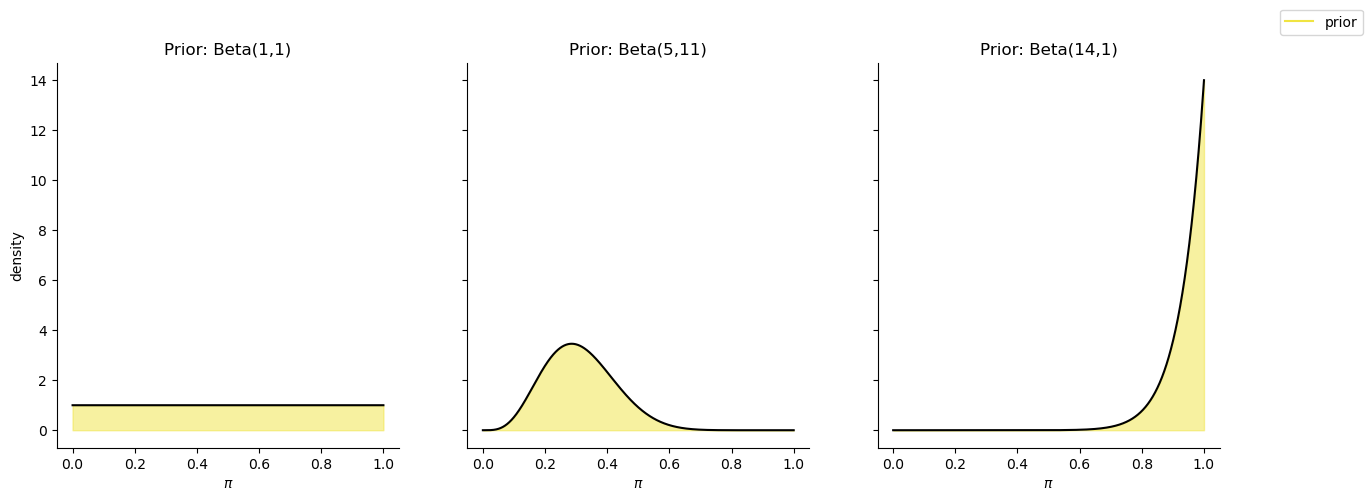

In [73]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import beta
from matplotlib.lines import Line2D

# 定义不同的 Beta 分布参数
params = [(1,1),(5,11),(14,1)]

# 创建一个包含三个子图的画布
fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)

# 定义横坐标的值
x = np.linspace(0,1,10000)

# 循环遍历不同的参数组合
for i,(alpha_,beta_) in enumerate(params):
    # 计算 Beta 分布的概率密度函数值
    pdf_values = beta.pdf(x,alpha_,beta_)
    # 绘制 Beta 分布的线图
    sns.lineplot(x=x,y=pdf_values,ax=axes[i],color="black")
    # 填充 Beta 分布下的区域
    axes[i].fill_between(x, pdf_values, color="#f0e442", alpha=0.5)
    # 设置子图标题
    axes[i].set_title(f'Prior: Beta({alpha_},{beta_})')
    # 设置 x 和 y 轴标签
    axes[i].set_xlabel('$\pi$')
    axes[i].set_ylabel('density')

# 创建自定义图例
custom_lines = [Line2D([], [], color="#f0e442"),]

# 将图例放置在子图外部的右上角       
fig.legend(custom_lines, ['prior'],loc='outside upper right',bbox_to_anchor=(1, 1))

# 移除图的上、右边框线
sns.despine()


**不同类型的先验**

我们来回顾一下从先验中我们可以获得什么信息

* 在上图中，不同的先验，反映了人们对测试通过率的不同信念(认为$\pi$主要集中分布在哪里)

* 同时，先验分布的集中程度也反映了人们对某种信念的肯定程度

比如，对于$Beta(14,1)$这个先验，$\pi$的取值集中分布在0.8-1.0这种“高通过率区域”，说明乐观主义者的信念是很肯定的。

而对于$Beta(1,1)$这个先验，$\pi$的取值均匀分布在0-1之间，吃瓜群众觉得$\pi$取任何值的可能性都是一样的，换言之她们也不知道$\pi$可能是多少。

-------------------------

以上两种先验，可被总结为**信息型先验(informative prior)**和**模糊型先验(vague prior)**，其中：

* **信息型先验**：先验分布比较窄，可变范围小，说明此先验强烈，可以提供比较确定的信息，如$Beta(14,1)$

* **模糊型先验**：先验分布的可变范围大，无法提供确定的信息，如$Beta(1,1)$

**调查数据**

在继续探究不同的先验如何影响后验之前，我们还需要一些数据

假设现在随机抽取20部电影，并对这些电影进行测试，结果显示有9部电影可以通过测试

In [74]:
import pandas as pd
import numpy as np

# 读取 bechdel.csv 文件的数据
bechdel = pd.read_csv("./data/bechdel.csv")

# 设置随机数种子以确保结果可复现
np.random.seed(84735)

# 从 bechdel 数据中随机抽取 20 条数据
bechdel_20 = bechdel.sample(n=20)

# 打印前 5 条抽取的数据
bechdel_20.head()


,year,title,binary
1690,1984,Gremlins,FAIL
283,2011,The Green Hornet,FAIL
1069,2003,Wrong Turn,PASS
784,2006,Quinceanera,PASS
1373,1998,Sliding Doors,PASS


In [75]:
#统计 'binary' 列中各个值的出现次数
bechdel_20['binary'].value_counts()

binary
FAIL    11
PASS     9
Name: count, dtype: int64

**beta-binomial组合**

在某一通过率$\pi$下，随机抽取20部电影，其中有9部电影通过的可能性，这个似然函数可以用二项分布来表示。

\begin{split}
Y | \pi & \sim \text{Bin}(n, \pi)
\end{split}  .

$$  
f(y|\pi) = P(Y=y | \pi) = \binom{20}{9} \pi^9 (1-\pi)^{11}  
$$  

------------------------

这里，我们的通过率$\pi$服从$Beta$分布，似然函数服从二项分布

\begin{split}
Y | \pi & \sim \text{Bin}(n, \pi)  \\
\pi & \sim \text{Beta}(\alpha, \beta) \\ 
\end{split}  .

从上一节我们知道，这种情况下的后验仍是beta分布，并且可以表示为：
$$
\pi | (Y = y) \sim \text{Beta}(\alpha + y, \beta + n - y)
$$



**🤔 思考时间**

下图画出了三种先验-似然组合，

我们可以猜测一下，哪一种后验分布的形状和似然分布的形状最为类似：


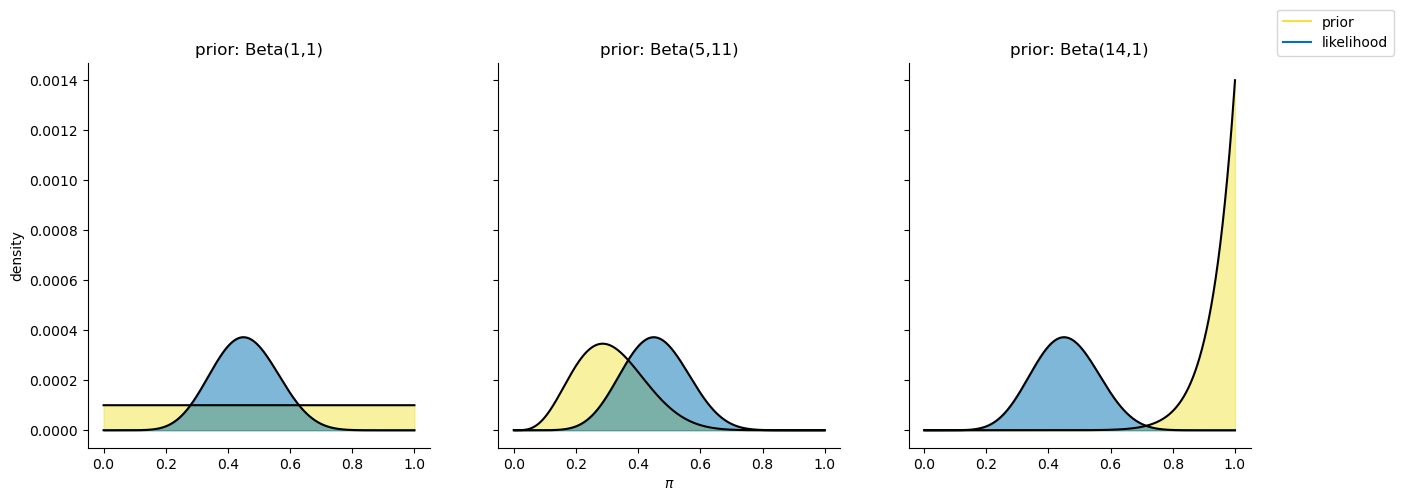

In [76]:
# 定义不同的 Beta 分布参数
params = [(1, 1), (5, 11), (14, 1)]

# 创建一个包含三个子图的画布
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
x = np.linspace(0, 1, 10000)

# 计算二项分布的 likelihood
likelihood_value = st.binom.pmf(9, 20, x) / np.sum(st.binom.pmf(9, 20, x))

# 循环遍历不同的参数组合
for i, (alpha_, beta_) in enumerate(params):
    # 计算 Beta 分布的概率密度函数值
    pdf_values = beta.pdf(x, alpha_, beta_) / np.sum(beta.pdf(x, alpha_, beta_))
    
    # 绘制 Beta 分布的线图
    axes[i].plot(x, pdf_values, color="black")
    axes[i].fill_between(x, pdf_values, color="#f0e442", alpha=0.5)
    
    # 绘制 likelihood 的线图
    axes[i].plot(x, likelihood_value, color="black")
    axes[i].fill_between(x, likelihood_value, color="#0071b2", alpha=0.5)
    
    # 设置子图标题
    axes[i].set_title(f'prior: Beta({alpha_},{beta_})')

# 设置 x 和 y 轴标签
axes[1].set_xlabel('$\pi$')
axes[0].set_ylabel('density')

# 创建自定义图例
custom_lines = [Line2D([], [], color="#f0e442"),
                Line2D([], [], color="#0071b2")]
        
# 将图例放置在子图外部的右上角
fig.legend(custom_lines, ['prior', 'likelihood'], loc='outside upper right', bbox_to_anchor=(1, 1))

# 移除图的上、右边框线
sns.despine()


**后验图示**

我们可以使用公式来快速得到三种后验的表达式
$$
\pi | (Y = y) \sim \text{Beta}(\alpha + y, \beta + n - y)
$$

|Analyst|Prior  |Posterior  
|----|-----|----|  
|$\alpha$   |Beta(5,11)|Beta(14,22)|  
|$\beta$   |Beta(1,1)|Beta(10,12)|  
|mean   |Beta(14,1) |Beta(23,12)|  


然后，我们可以把这些分布画出来：
 

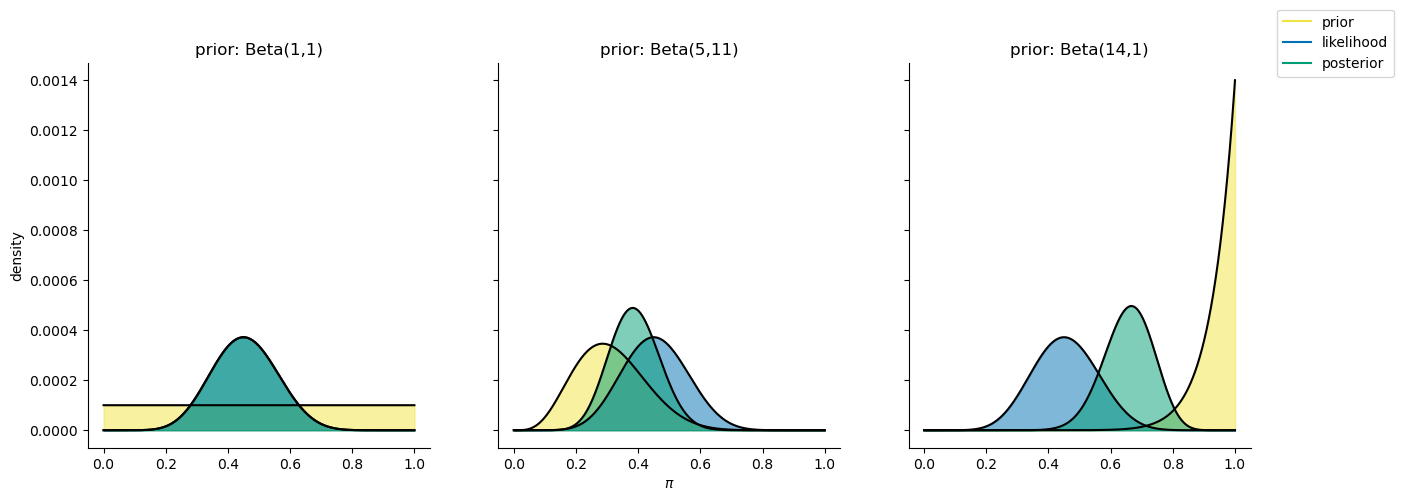

In [77]:
# 定义不同的 Beta 分布参数
params = [(1, 1), (5, 11), (14, 1)]

# 创建一个包含三个子图的画布
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
x = np.linspace(0, 1, 10000)

# 循环遍历不同的参数组合
for i, (alpha_, beta_) in enumerate(params):
    # 计算二项分布的似然值
    likelihood_value = st.binom.pmf(9, 20, x)
    
    # 计算 Beta 分布的概率密度函数值并进行归一化
    pdf_values = beta.pdf(x, alpha_, beta_) / np.sum(beta.pdf(x, alpha_, beta_))
    
    # 计算后验概率
    posterior = pdf_values * likelihood_value
    posterior /= np.sum(posterior)
    likelihood_value /= np.sum(likelihood_value)
    
    # 绘制先验分布的线图
    axes[i].plot(x, pdf_values, color="black", label="prior")
    axes[i].fill_between(x, pdf_values, color="#f0e442", alpha=0.5)
    
    # 绘制似然值的线图
    axes[i].plot(x, likelihood_value, color="black", label="likelihood")
    axes[i].fill_between(x, likelihood_value, color="#0071b2", alpha=0.5)
    
    # 绘制后验概率的线图
    axes[i].plot(x, posterior, color="black", label="posterior")
    axes[i].fill_between(x, posterior, color="#009e74", alpha=0.5)

    # 设置子图标题
    axes[i].set_title(f'prior: Beta({alpha_},{beta_})')

# 设置 x 和 y 轴标签
axes[1].set_xlabel('$\pi$')
axes[0].set_ylabel('density')

# 创建自定义图例
custom_lines = [Line2D([], [], color="#f0e442"),
                Line2D([], [], color="#0071b2"),
                Line2D([], [], color="#009e74")]
        
# 将图例放置在子图外部的右上角
fig.legend(custom_lines, ['prior', 'likelihood', 'posterior'], loc='outside upper right', bbox_to_anchor=(1, 1))

# 移除图的上、右边框线
sns.despine()


我们关注信息型先验和模糊型先验下的后验有什么区别：

* 在吃瓜群众这里，后验分布和似然分布重合了，这是因为她们的先验分布无法提供任何关于$\pi$的有效信息，因此对$\pi$的认知更新都来源于似然分布。

* 乐观主义者对$\pi$的后验估计仍集中于0.6-0.8的区域，因为她们一开始对$\pi$的信念是很强烈的（均值高，可变性小），所以只有45%的电影能够通过测试这一事件并未对她们的乐观信念产生较大影响。


### Different data, different posteriors

**不同的似然**

在看过乐观主义者的例子之后，你或许会想，当人们的先验认知过于主观时，客观数据难以对认知更新产生影响。

但并不是一直如此，通过贝叶斯公式我们知道，后验的分布主要取决于先验与似然

$$  
f(\pi | y) = \frac{f(\pi)L(\pi|y)}{f(y)} \propto f(\pi)L(\pi|y)  
$$  

接下来我们将看到，在强先验下，不同的似然对后验分布的影响。

------------------
-----------------


假设现在新增了三位调查员，小红、小蓝、小绿，她们都是乐观主义者，对$\pi$有着**共同的先验信念Beta(14,1)**，但在调查的过程中，她们接触到了**不同的数据**。


* 小红调查了1991年的13份电影，其中有6部(46%)通过了测试
* 小蓝调查了2000年的63份电影，其中有29部(46%)通过了测试
* 小绿调查了2013年的99份电影，其中有46部(46%)通过了测试


在这里，三位调查员调查的电影数量不同，但调查结果都是相似的46%

我们可以把三种似然函数写出来：
$$  
小红：
f(6|\pi) = \binom{13}{6} \pi^6 (1-\pi)^{7}  
$$  

$$  
小蓝：
f(29|\pi) = \binom{63}{29} \pi^{29} (1-\pi)^{34}  
$$  

$$  
小绿：
f(46|\pi) = \binom{99}{46} \pi^{46} (1-\pi)^{53}  
$$  


我们同样可以把三种不同的似然分布画出来：

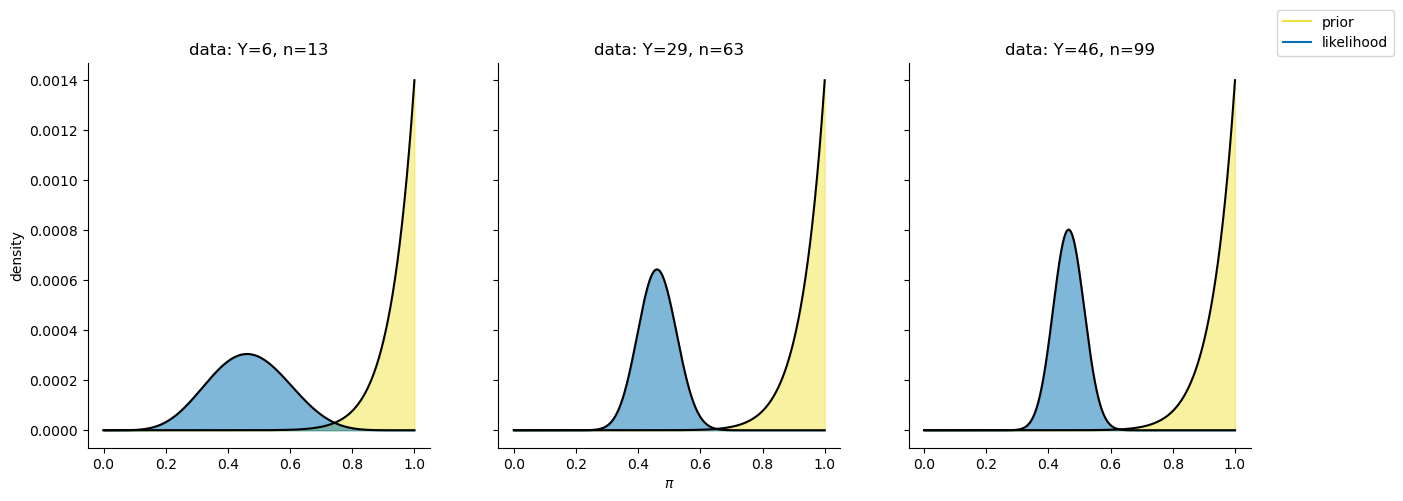

In [78]:
# 定义不同的二项分布参数 (y, n)
params = [(6, 13), (29, 63), (46, 99)]

# 创建一个包含三个子图的画布
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
x = np.linspace(0, 1, 10000)

# 设置 Beta 分布的参数
alpha_ = 14
beta_ = 1

# 计算 Beta 分布的概率密度函数值并进行归一化
pdf_values = beta.pdf(x, alpha_, beta_) / np.sum(beta.pdf(x, alpha_, beta_))

# 循环遍历不同的参数组合 (y, n)
for i, (y, n) in enumerate(params):
    # 计算二项分布的似然值并进行归一化
    likelihood_value = st.binom.pmf(y, n, x) / np.sum(st.binom.pmf(y, n, x))

    # 绘制先验分布的线图
    axes[i].plot(x, pdf_values, color="black", label="prior")
    axes[i].fill_between(x, pdf_values, color="#f0e442", alpha=0.5)
    
    # 绘制似然值的线图
    axes[i].plot(x, likelihood_value, color="black", label="likelihood")
    axes[i].fill_between(x, likelihood_value, color="#0071b2", alpha=0.5)

    # 设置子图标题
    axes[i].set_title(f'data: Y={y}, n={n}')

# 设置 x 和 y 轴标签
axes[1].set_xlabel('$\pi$')
axes[0].set_ylabel('density')

# 创建自定义图例
custom_lines = [Line2D([], [], color="#f0e442"),
                Line2D([], [], color="#0071b2")]
        
# 将图例放置在子图外部的右上角
fig.legend(custom_lines, ['prior', 'likelihood'], loc='outside upper right', bbox_to_anchor=(1, 1))

# 移除图的上、右边框线
sns.despine()



🤔思考时间：
谁的后验分布受到数据的影响更大？

**似然对后验的影响**


我们可以发现，虽然三种似然分布的均值都是0.46，但是随着样本量增大，似然的分布越窄，反映的信息越集中。

*注意：在似然中，y轴为$f(y|\pi)$，表示在特定的$\pi$值下产生当前数据的相对可能性。*

* 在小红的似然函数中，“13部电影中有6部通过测试”的结果在$\pi$为0.15-0.75时，都有可能出现。

* 但在小绿的似然函数中，“99部电影中有46部通过测试”的结果只在$\pi$为0.35-0.55时，才有可能出现。

* 换言之，小绿的似然函数直接将pi的可能取值缩小到一个更小的范围


**当似然反映的信息越集中时，它对后验的影响越大**


-----------------------------

同样的，我们可以使用公式快速计算出后验beta分布中的参数，并画图

|Analyst|Data  |Posterior  
|----|-----|----|  
|red   |Y=6 of n=13|Beta(20,8)|  
|blue   |Y=29 of n=63|Beta(43,35)|  
|green   |Y=46 of n=99|Beta(60,54)|


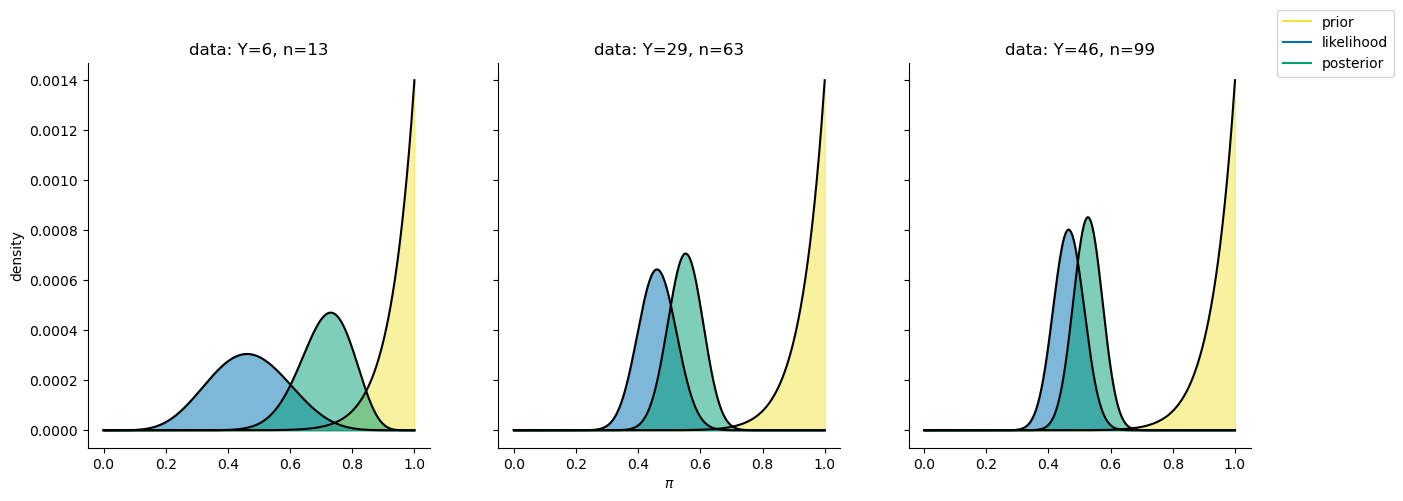

In [79]:
# 定义不同的二项分布参数 (y, n)
params = [(6, 13), (29, 63), (46, 99)]

# 创建一个包含三个子图的画布
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
x = np.linspace(0, 1, 10000)

# 设置 Beta 分布的参数
alpha_ = 14
beta_ = 1

# 计算 Beta 分布的概率密度函数值
pdf_values = beta.pdf(x, alpha_, beta_)

# 循环遍历不同的参数组合 (y, n)
for i, (y, n) in enumerate(params):
    # 计算二项分布的似然值
    likelihood_value = st.binom.pmf(y, n, x)
    
    # 计算后验概率
    posterior = pdf_values * likelihood_value
    
    # 归一化后验概率、先验概率和似然值
    posterior /= np.sum(posterior)
    pdf_values /= np.sum(pdf_values)
    likelihood_value /= np.sum(likelihood_value)

    # 绘制先验分布的线图
    axes[i].plot(x, pdf_values, color="black", label="prior")
    axes[i].fill_between(x, pdf_values, color="#f0e442", alpha=0.5)
    
    # 绘制似然值的线图
    axes[i].plot(x, likelihood_value, color="black", label="likelihood")
    axes[i].fill_between(x, likelihood_value, color="#0071b2", alpha=0.5)
    
    # 绘制后验概率的线图
    axes[i].plot(x, posterior, color="black", label="posterior")
    axes[i].fill_between(x, posterior, color="#009e74", alpha=0.5)

    # 设置子图标题
    axes[i].set_title(f'data: Y={y}, n={n}')

# 设置 x 和 y 轴标签
axes[1].set_xlabel('$\pi$')
axes[0].set_ylabel('density')

# 创建自定义图例
custom_lines = [Line2D([], [], color="#f0e442"),
                Line2D([], [], color="#0071b2"),
                Line2D([], [], color="#009e74")]
        
# 将图例放置在子图外部的右上角
fig.legend(custom_lines, ['prior', 'likelihood', 'posterior'], loc='outside upper right', bbox_to_anchor=(1, 1))

# 移除图的上、右边框线
sns.despine()

### Striking a balance between the prior & data

**不同先验+不同似然产生的后验分布**

我们已经看到不同的先验和不同的数据对后验分布的影响

**实际上，后验分布是两者间的平衡。**

我们可以将不同的先验和似然组合在一起，观察后验的变化

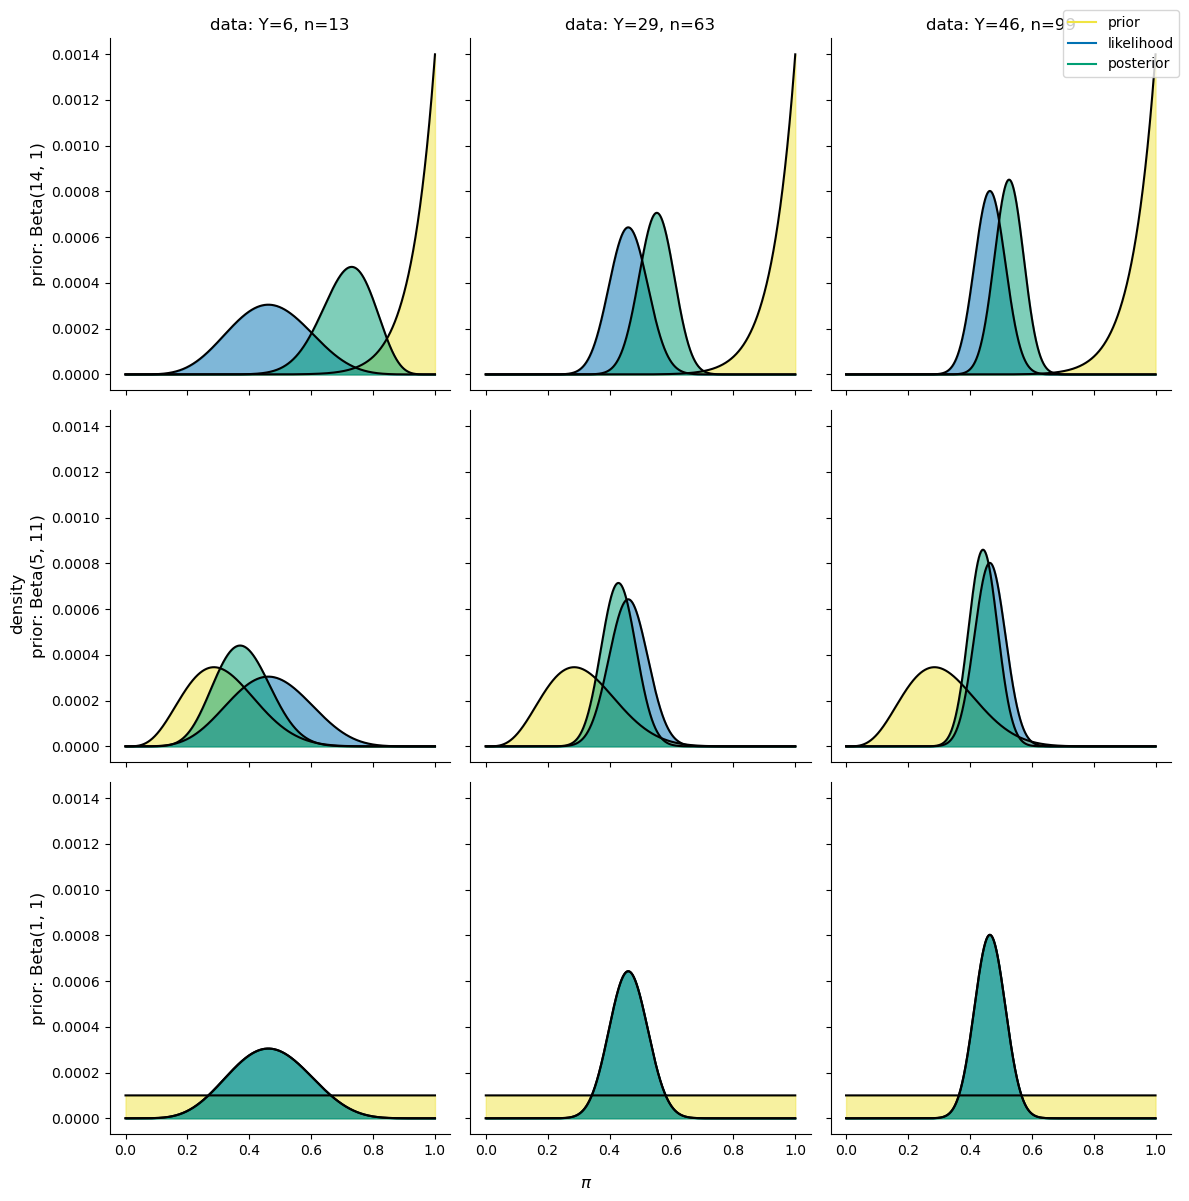

In [81]:
# 生成一系列 pi 值
x = np.linspace(0, 1, 10000)

# 创建一个 DataFrame 以存储 pi 值和后验分布
df = pd.DataFrame({'pi': x})

# 定义似然值
likelihoods = [(6, 13), (29, 63), (46, 99)]

# 定义先验分布
priors = [(14, 1), (5, 11), (1, 1)]

# 创建一个 3x3 的子图网格，用于绘制九个图
fig, axs = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

# 计算并绘制所有似然值和先验分布组合的后验分布
for i, prior_params in enumerate(priors):
    for j, lik_params in enumerate(likelihoods):

        prior_name = f'prior_{prior_params[0]}_{prior_params[1]}'
        lik_name = f'lik_{lik_params[0]}_{lik_params[1]}'
        posterior_name = f'posterior_{lik_params[0]}_{lik_params[1]}_{prior_params[0]}_{prior_params[1]}'
        
        # 计算先验分布
        df[prior_name] = df['pi'].apply(lambda x: beta.pdf(x, prior_params[0], prior_params[1]))

        # 计算似然值
        df[lik_name] = df['pi'].apply(lambda x: st.binom.pmf(lik_params[0], lik_params[1], x))

        # 计算后验分布通过将似然值和先验分布相乘
        df[posterior_name] = df[lik_name] * df[prior_name]

        # 对似然值、先验分布和后验分布进行归一化
        df[lik_name] /= df[lik_name].sum()
        df[prior_name] /= df[prior_name].sum()
        df[posterior_name] /= df[posterior_name].sum()
        
        # 绘制先验分布、归一化似然值和后验分布的密度图
        axs[i, j].plot(df['pi'], df[prior_name], label='prior', color='black')
        axs[i, j].fill_between(df['pi'], df[prior_name], color="#f0e442", alpha=0.5)

        axs[i, j].plot(df['pi'], df[lik_name], label='likelihood', color='black')
        axs[i, j].fill_between(df['pi'], df[lik_name], color="#0071b2", alpha=0.5)

        axs[i, j].plot(df['pi'], df[posterior_name], label='posterior', color='black')
        axs[i, j].fill_between(df['pi'], df[posterior_name], color="#009e74", alpha=0.5)

        axs[0, j].set_title(f'data: Y={lik_params[0]}, n={lik_params[1]}')

    axs[i, 0].set_ylabel(f'prior: Beta{prior_params}', fontsize=12)

fig.supxlabel('$\pi$')
fig.supylabel('density')

# 创建自定义图例
custom_lines = [Line2D([], [], color="#f0e442"),
                Line2D([], [], color="#0071b2"),
                Line2D([], [], color="#009e74")]
        
# 将图例放置在图的右上角
fig.legend(custom_lines, ['prior', 'likelihood', 'posterior'], loc='outside upper right', bbox_to_anchor=(1, 1))

# 调整子图之间的间距
plt.tight_layout()

# 移除图的上、右边框线
sns.despine()



* 从左往右，数据的样本量从13增加到99，似然的分布越集中，对后验的影响也越来越大

* 从上往下，先验分布从信息型(informative prior)变为模糊型(vague prior)，先验分布对后验分布的影响也就越来越小

* 而最后一列告诉我们，无论三种人先验的差异有多大，只要似然的分布够集中，即数据提供的信息足够丰富，那么后验分布主要受到来自数据的影响，三种人的后验分布也并不会相差太大。

### Sequential analysis: Evolving with data 


> 🎈Recap: 在之前我们探讨了随着更多数据的到来，数据的影响力逐渐增加，先验观念的影响力逐渐减小，从而影响后验理解的演进。

我们再次回顾一下 第3节课中例子。纣王让姬发在质子团中组织对于自己支持率的民意调查。
- 其中，π 代表的是支持纣王的概率。
- 我们假设一开始他的支持率很低：π ∼ Beta(1, 10)。
- 但随着纣王施展他的权威，越来越多人对他的态度开始产生了改变。
- 当然，一些人在纣王的淫威下选择倒戈于他，另一些人不满于的他霸权选择反抗。
- 现在，姬发每天都会对纣王支持率进行一次统计，并把之前的统计作为先验，而帮当天的统计作为数据，从而推测纣王在之后的支持率。

![Image Name](https://cdn.kesci.com/upload/s141bvd2cb.PNG?imageView2/0/w/600/h/600)  

- 第一天，姬发评估了 n=10 名质子，只有 Y=1 名质子选择支持纣王。因此，到第一天结束时，姬发对 π 的理解已经发生了改变：
    $$
    \pi | (Y = 1) \sim \text{Beta}(2,19)
    $$

> 后验参数是通过 α + y = 1 + 1 和 β + n − y = 10 + 10 − 1 计算的。


- 第二天，被调查的质子更多：在 n = 20 质子中，有 Y = 17 的突然选择支持纣王(🤐听说他们的父亲受到了威胁)。因此，到第二天结束时，姬发对 π 的估计再次发生了改变：

> ❔问题！第二天结束时，姬发对 π 的后验估计是什么？
> - a) Beta(19,22) 
> - b) Beta(18,13)

如果你的答案是“a”，那么你和姬发的估计是一致的！

- 第二天结束时 π 的后验模型是 Beta(19,22)。

在第三天，n = 10 质子中 Y = 8质子选择支持纣王 (情况似乎不妙了😱)

- 姬发对纣王支持率 π 的估计从 Beta(19,22) 逐渐演变为 Beta(27,24)。

可以发现，姬发对纣王的支持率的估计从原始的 Beta(1,10) 巨变为在三天研究结束时的 Beta(27,24)。

**顺序贝叶斯分析(sequential Bayesian analysis)**

姬发刚刚逐步更新对纣王支持率 π 的后验模型的过程，更一般地被称为顺序贝叶斯分析或贝叶斯学习(Bayesian learning)。
- 第二天：后验参数是通过 α + y = 2 + 17 和 β + n − y = 19 + 20 − 17 计算的。
- 第三天：后验参数是通过 α + y = 19 + 8 和 β + n − y = 22 + 10 − 8 计算的。

TABLE 4.3
|Day|Data|Model|
|---|---|---|
|0|NA|Beta(1,10)|
|1|Y = 1 of n = 10|Beta(2,19)|
|2|Y = 17 of n = 20|Beta(19,22)|
|3|Y = 8 of n = 10|Beta(27,24)|

FIGURE 4.5
![](https://www.bayesrulesbook.com/bookdown_files/figure-html/ch4-sequential-plot-1-1.png)

**顺序贝叶斯分析（又称贝叶斯学习）** 

- 在顺序贝叶斯分析中，随着新数据的到来，后验模型会逐步更新。
- 每一份新数据都会使前一次后验模型（反映我们在观察到这些数据之前的理解）成为新的先验模型。


![Image Name](https://cdn.kesci.com/upload/image/rhqd6akbc6.gif?imageView2/0/w/500/h/500)  

贝叶斯框架的一个最强大的特性就是能够随着新数据的到来而演进。这种顺序分析还维持了两个基本的且符合常识的特性。

- 首先，最终的后验模型是数据顺序不变的，即，它不受我们观察数据的顺序的影响。
- 例如，姬发以第三天的观测为先验，以第一和二天的观测为数据：第三天 Y = 8 的 n = 10，第二天 Y = 17 的 n = 20，第一天 Y = 1 的 n = 10。
- 虽然姬发对 π 的推断的演进路径不同。但是，它仍然会最终达到相同的地方——Beta(27,24) 后验。

TABLE 4.4
|Day|Data|Model|
|---|---|---|
|0|NA|Beta(1,10)|
|1|Y = 8 of n = 10|Beta(9,12)|
|2|Y = 17 of n = 20|Beta(26,15)|
|3|Y = 1 of n = 10|Beta(27,24)|

![](https://www.bayesrulesbook.com/bookdown_files/figure-html/ch4-sequential-plot-2-1.png)

顺序分析的第二个基本特性是，最终的后验只依赖于累积的数据。
- 例如，在姬发三天的观测中，共有 n = 10 + 20 + 10 = 40 被观测者，其中 Y = 1 + 17 + 8 = 26 的质子施选择支持纣王。
- 甚至，姬发可以一次性评估这些数据，而不是逐步评估。这样，他可以直接从原始的 Beta(1,10) 先验模型跳到 π 的 Beta(27,24) 后验模型。
- 也就是说，无论我们是逐步评估数据还是一次性评估，我们最终会得到相同的结果。

**补充：贝叶斯顺序分析两大特征的数学证明**

在之前我们看到了数据顺序不变性的实例。接下来，我们将证明这一特性适用于所有贝叶斯模型。

> 数据顺序不变性 定义 θ 为感兴趣的任意参数，其先验概率密度函数为 f (θ)。那么，我们先观察数据点 y1，然后观察第二个数据点 y2 的顺序，将产生与先观察 y2，然后观察 y1 相同的后验模型 θ：f (θ∣y1, y2) = f (θ∣y2, y1)。同样，后验模型对于一次性观察所有数据和顺序观察数据是不变的。

为了证明数据顺序不变性的性质，让我们首先指定后验概率密度函数 f (θ∣y1, y2) 的结构，该函数通过依次观察数据 y1 和 y2 的方式进行演化。在这个演化的第一步中，我们从原始先验概率密度函数 f (θ) 和给定第一个数据点 y1 的似然函数 L(θ∣y1) 构建后验概率密度函数：

$$
f(\theta|y_1) = \frac{\text{先验概率} \cdot \text{似然函数}}{\text{归一化常数}} = \frac{f(\theta)L(\theta|y_1)}{f(y_1)}
$$

在第二步中，我们根据观察到的新数据 y2 更新我们的模型。在这样做时，不要忘记我们从由 f (θ∣y1) 指定的先验模型开始，因此

$$
f(\theta|y_2) = \frac{\frac{f(\theta)L(\theta|y_1)}{f(y_1)}L(\theta|y_2)}{f(y_2)} =  \frac{f(\theta)L(\theta|y_1)L(\theta|y_2)}{f(y_1)f(y_2)}
$$

类似地，以相反的顺序观察数据 y2 然后 y1，会产生等价的后验模型：

$$
f(\theta|y_2,y_1) =  \frac{f(\theta)L(\theta|y_2)L(\theta|y_1)}{f(y_2)f(y_1)} .
$$

最后，不仅数据的顺序不影响 θ 的最终后验模型，而且观察数据是一次性还是顺序观察也无关紧要。为此，假设我们从原始的 f (θ) 先验开始，并同时观察数据 (y1, y2)，而不是顺序观察。进一步假设这些数据点在无条件和有条件下是独立的，因此

$$
f(y_1,y_2) = f(y_1)f(y_2) \;\; \text{ 和 } \;\; f(y_1,y_2 | \theta) = f(y_1|\theta)f(y_2|\theta)  .
$$

那么，从这个"数据扔进来"的过程得到的后验概率密度函数等同于以上顺序分析得到的结果：

$$
\begin{split}
f(\theta|y_1,y_2) 
& = \frac{f(\theta)L(\theta|y_1,y_2)}{f(y_1,y_2)} \\
& = \frac{f(\theta)f(y_1,y_2|\theta)}{f(y_1)f(y_2)} \\
& = \frac{f(\theta)L(\theta|y_1)L(\theta|y_2)}{f(y_1)f(y_2)}  . \\
\end{split}
$$

### 极端先验对于顺序分析的影响


一个极端固执的先验模型可能会使得贝叶斯失去顺序分析的优势。

- 这样的极端先验模型往往包含先验概率为零的信念。
- 如果姬发一开始对纣王的支持有着固执的信念，坚持认为纣王不可能获得支持。例如 π 在 0 到 0.25 之间的任何值是等可能的，并且肯定不会超过 0.25。通过在 0 到 0.25 上的均匀模型(uniform model)可以表达这种先验信念：

$$
\pi \sim \text{Unif}(0,0.25)
$$

$$
f(\pi) = 4 \; \text{ for } \pi \in [0, 0.25] 
$$

现在，假设姬发被告知 10 名质子中有 8 人支持纣王。这个 80% 的数据与姬发的信念相悖。

> ❔问题！请根据这个数据猜测一下姬发对于纣王支持率的后验推断。

![](https://www.bayesrulesbook.com/bookdown_files/figure-html/ch4-stubborn-plot-1.png)


尽管图 (c)看起来奇怪， 但它的确代表了姬发在观察到数据的情况下对信念 π 的更新。

- **后验概率模型的定义与先验概率模型的定义相同**。
- 也就是说，后验模型的形状继承自先验模型。
- 由于姬发的先验信念不存在对于纣王的信任，也就是超过 0.25 的 π 值的概率分配为零，他们的后验模型也必须将该范围内的任何值的概率分配为零。
- 从数学上讲，对于任意的 π ∉ [0, 0.25]，后验概率密度函数 f (π∣y = 8) = 0，对于任意的 π ∈ [0, 0.25]，有

$$
\begin{split}
f(\pi | y=8) 
& \propto f(\pi)L(\pi | y=8) \\
& = 4 \cdot \left(\!\begin{array}{c} 10 \\ 8 \end{array}\!\right) \ \pi^{8} (1-\pi)^{2} \\
& \propto \pi^{8} (1-\pi)^{2}. \\
\end{split}
$$

这个数学结果的含义是巨大的。
- 无论姬发收集到多少相反的证据，他的后验概率永远不会超过 0.25 的上限

> Tips：如何避免令人遗憾的先验模型
> - 幸运的是，我们有一些好消息, 这种使得贝叶斯顺序分析失效的情况是完全可以避免的。
> - 确保对每个可能的 π 值都分配非零的可信度，即使这个可信度接近于零。例如，如果 π 是一个可以从 0 到 1 的比例，那么你的先验模型也应该在这个连续范围内进行定义。

![Image Name](https://cdn.kesci.com/upload/image/rhqcb9gji7.png?imageView2/0/w/500/h/500) 

### 贝叶斯的主观性

在之前我们提到了一个关于贝叶斯统计的常见批评观点——它的主观性。
  
- 一些人担心“主观地”调整先验模型会使贝叶斯分析人员得出他们想要的任何结论。
- 在学习完这节课后我们可以更严谨地回应这个观点。

> 在我们回应之前，重新思考并扩展一下你在整本书中探讨过的一些概念。
> ❔问题！对于下面的每个陈述，请判断该陈述是真还是假，并提供你的推理。

- 所有的先验选择都是具有信息量的。
- 有可能有充分的理由选择具有信息量的先验。
- 任何先验选择都可以被足够多的数据克服。
- 频率学派的范式是完全客观的。

答案：

1. 错误。模糊的先验通常是不具有信息量的。
2. 正确。我们可能有充足的先前数据或专业知识来构建我们的先验。
3. 错误。如果你将潜在的参数值赋予零先验概率，任何数量的数据都无法改变它！
4. 错误。主观性总是渗透到频率学派和贝叶斯分析中。在贝叶斯范式中，我们至少可以命名和量化这种主观性的方面。

在第4节课中，你已经确认贝叶斯分析确实可以基于“主观”经验建立先验。

- 在最理想的情况下，这不是件坏事，主观先验可以反映出丰富的过去经验，应该纳入我们的分析中——不这样做是不幸的。即使主观先验与实际观察到的证据相矛盾，随着这些证据的累积，它对后验的影响会逐渐消失。
- 我们已经见过一个最糟糕的例外情况。而且这是可以预防的。如果主观先验足够顽固和极端，它会将可能的参数值的概率分配为零，那么任何数量的反证据都不足以改变它。

贝叶斯学派和频率学派的差异对比  

**任何统计分析方法都不可能完全客观，因此主观性是一个相对概念:**  

* 贝叶斯学派的主观性通过先验的设定来体现，透明，不易让人产生误解  

* 频率学派的主观性暗含在各种**前提预设**中，比如方差分析中的方差齐性和正态性，这种看似‘客观的’预设，一方面难以满足，一方面也是一种主观的设定。  

* 更为宏观的来说，样本的抽取，数据清理方式的选择，分析方法的选择，$p$值的设定，这些都存在主观性。因此，频率学派并没有想象的那么‘客观’。  

* 主观不一定是坏事：通过量化方法将个体的经验和专家知识整合到数据分析之中。 

|                     | 频率学派   | 贝叶斯学派   |  
| ------------------- | ---------- | ------------ |  
| 世界真相 (参数) | 固定       | 变化         |  
| 概率                | 抽样的噪音 | 信念         |  
| 推断过程            | NHST       | 贝叶斯定理   |  
| 数据                | 存在噪音   | 固定         |  
| 推断可更新性        | 否         | 是           |  
| 主观性              | 前提预设   | 通过先验设定 |

最后，尽管我们鼓励你在应用贝叶斯方法时保持批判性，但请不要担心它们比频率主义方法更主观。没有人能够从分析中完全消除主观性。我们所拥有的生活经验和知识影响着我们的一切，从我们提出的研究问题到我们收集的数据。在贝叶斯和频率主义分析中都要考虑这种主观性的潜在影响是很重要的。

练习 4.1（将先验与描述配对）。

下面列出了五种不同的π的先验模型。
请用以下描述之一标记每个先验：有些偏向π < 0.5，有些强烈偏向π < 0.5，有些将π置于0.5中心，有些偏向π > 0.5，有些强烈偏向π > 0.5。
- a) Beta(1.8,1.8)
- b) Beta(3,2)
- c) Beta(1,10)
- d) Beta(1,3)
- e) Beta(17,2)

练习 4.2（将图形与代码配对）。

下面的绘图函数更可能使用了哪些参数生成了下面的图形？
![](https://www.bayesrulesbook.com/bookdown_files/figure-html/unnamed-chunk-142-1.png)
- a) alpha = 2, beta = 2, y = 8, n = 11
- b) alpha = 2, beta = 2, y = 3, n = 11
- c) alpha = 3, beta = 8, y = 2, n = 6
- d) alpha = 3, beta = 8, y = 4, n = 6
- e) alpha = 3, beta = 8, y = 2, n = 4
- f) alpha = 8, beta = 3, y = 2, n = 4

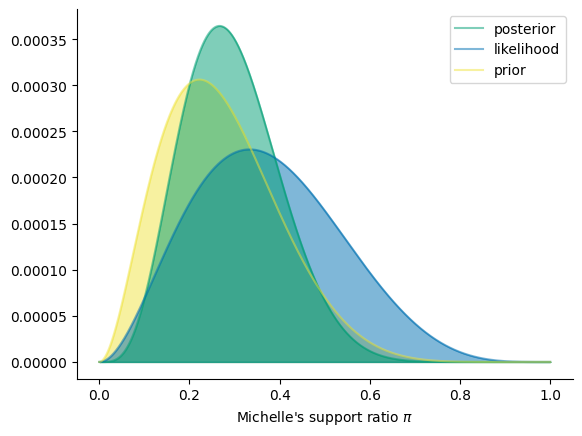

In [ ]:
# 导入数据加载和处理包：pandas
import pandas as pd
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt
# 导入高级绘图工具 seaborn 为 sns
import seaborn as sns
# 导入统计建模工具包 scipy.stats 为 st
import scipy.stats as st 


#---------------------------------------------------------------------------
#                            请填入 Beta 分布参数，alpha 和 beta
#---------------------------------------------------------------------------
# 设置 Beta 分布参数
a = ...     # alpha
b = ...     # beta

#---------------------------------------------------------------------------
#                            请填入观测数据 y 和 n
#---------------------------------------------------------------------------
y = ...     # y 代表支持数
n = ...     # n 代表总人数


# 设置 x 轴范围 [0,1]
x = np.linspace(0,1,10000)
# 形成先验分布 
prior = st.beta.pdf(x,a,b)/np.sum(st.beta.pdf(x,a,b))
# 形成似然
likelihood = st.binom.pmf(y,n,x)

# 计算后验
unnorm_posterior = prior * likelihood                  # 计算分子
posterior = unnorm_posterior/np.sum(unnorm_posterior)  # 结合分母进行计算
likelihood = likelihood /np.sum(likelihood)            # 为了方便可视化，对似然进行类似后验的归一化操作 

# 绘图
plt.plot(x,posterior, color="#009e74", alpha=0.5, label="posterior")
plt.plot(x,likelihood, color="#0071b2", alpha=0.5, label="likelihood")
plt.plot(x,prior, color="#f0e442", alpha=0.5, label="prior")
plt.legend()
plt.xlabel("Michelle's support ratio $\pi$")
plt.fill_between(x, prior, color="#f0e442", alpha=0.5)
plt.fill_between(x, likelihood, color="#0071b2", alpha=0.5)
plt.fill_between(x, posterior, color="#009e74", alpha=0.5)
sns.despine()

### 总结

在本节课程中，我们探讨了后验模型在先验模型和数据之间的平衡。总的来说，我们观察到以下趋势：

- 先验影响：先验越不模糊、越具有信息量，即我们对先验越有确定性，先验对后验的影响就越大。
- 数据影响：我们拥有的数据越多，数据对后验的影响就越大。因此，即使具有不同的先验，如果两次测量的数据充足并且相似，那么他们的后验结果会非常相似。
- 此外，我们还看到在顺序贝叶斯分析中，随着越来越多的数据的出现，我们逐步更新后验模型。这个后验的最终结果不受观察数据的顺序（即后验对数据的顺序不变）或者是一次性观察数据还是逐步观察数据的影响。

### Bonus：使用数学公式证明，后验确实利用了来自先验和似然的信息

（* 注：以下涉及的公式包含上一节bonus中的内容）

由于后验分布属于beta分布，因此它的平均值可以写成：

$$
E(\pi | Y=y)  = \frac{\alpha + y}{\alpha + \beta + n}  .
$$

我们可以将$\frac{\alpha + y}{\alpha + \beta + n}$拆成以下两部分

\begin{split}
E(\pi | Y=y)  
& = \frac{\alpha}{\alpha + \beta + n} + \frac{y}{\alpha + \beta + n}  \\
& = \frac{\alpha}{\alpha + \beta + n}\cdot\frac{\alpha + \beta}{\alpha + \beta} + \frac{y}{\alpha + \beta + n}\cdot\frac{n}{n}  \\
& = \frac{\alpha + \beta}{\alpha + \beta + n}\cdot\frac{\alpha}{\alpha + \beta} + \frac{n}{\alpha + \beta + n}\cdot\frac{y}{n}  \\
& = \frac{\alpha + \beta}{\alpha + \beta + n}\cdot E(\pi) + \frac{n}{\alpha + \beta + n}\cdot\frac{y}{n}  .  \\
\end{split}

$$
y:success trial,\; n:total trials \\
y/n表示观察到的数据比例
$$

且，
$$
\frac{\alpha + \beta}{\alpha + \beta + n} + \frac{n}{\alpha + \beta + n} = 1.

$$


可以看到，后验均值可以被分解为 
<center>
权重*先验均值 + 权重*数据
</center>

那么，当数据越多，即n越大时，先验的权重就会更小，接近0；而数据的权重就会越大

因此，后验正是权衡了来自先验和似然的信息